# Project: Benchmarking Sorting Algorithms

## Introduction
***

### Concepts of Sorting 

The purpose of this assignment is to use Python to evaluate/benchmark five different sorting algorithims.
Sorting algorithims are used to manipulate data into a desired sequence or order. An example of this would include re-ordering the following list to "sort" it into numerical order.
    [6,9,3,4,8,7] -> [3,4,6,8,7,9]

There are a number of different factors to consider when a computer algorithim "sorts" data.
1. Complexity: 

In relation to algorithims, complexity is how the resources scale with the increasing demand of a larger dataset. As the input sizes increase, so too does the time taken to execute the sort. Space complexity can be seen as the amount of disk space for the alogrithm to sit atop. As the alogrithm executes, does it require further disk space? Also time complexity is worth consideration when determining the complexitiy of an algorithim - best, average and worst case time complexity. The best case would be the Omega notation when the data is pre-sorted to the desired sequence; the worst case would be Big-O notation, when the data is ordered in exactly the opposite sequence required - meaning all values in the list need to move. Finally, the average case Theta notation (which is average time taken for the alogrithim to execute) can be more dificult to determine.
2. Performance:

Performance is the real time execution of the algorithim. This can be affected by a number of factors - machine performance, specification, the code or compiler. Complexity can affect performance, but performance cannot affect complexity.   
3. In-place sorting

In-place sorting algorithims require no further calculation disk space when executing. As the input size increases no additonal space is required for processing the data.
4. Stable sorting

"A sorting algorithim is said to be stable if two objects with equal keys appear in the same order in sorted output as they appear in the input array to be sorted." [1]
5. Comparator functions

A comparator function is a piece of code, when executed, two parameters are passed in - it can determine if one is greater, equal or less than the other.
6. Comparison-based sorts

Comparison-based sorts are sorting alogrithms that implement the above "comparator function". We can sort a list of items by comparing their values to one another. If i is less than j, move i to the left until the list is sorted in numerical order. Some examples of comparsion based sorts will be discussed further below - Bubble, Selection and Insertion Sorts.
7. Non-comparison-based sorts

Unlike comparison-based sorts, non-comparison-based sorts do not evaluate a comparison between two items in a list. Counting Sort is a type of non-comparison-based sort and will be discussed further.

In this assignment, we will now review and benchmark five sorting algorithims - The Bubble Sort, Merge Sort, Count Sort, Selection Sort and Insertion Sort.

## Sorting Algorithms
***

### Bubble Sort


The bubble sort is said to be one of the most straightforward sorting algorithms, comparing the first item in a list with its neighbour to the right and swapping to the desired outcome. The code iterates over the list comparing and moving inputs where required.

The best case for the bubble sort is input "n" where all the values are pre-sorted to the desired secquence, while the worst case is n2 reviewing the array n2 times and as the number of inputs increases, therefore so too does the time taken to execute the sort. 

Below is an example of how the Sort works. We are given the "in Array - (6, 2, 1, 3)" the sort is required to output the same list in numerical order (1, 2, 3, 6). The alogrithm begins in position P1 (6) and reviews the value in P2. Six is greater than two therefore the positions are switched. We then progress to step two, P2 (6) is then compared to P3 (1) and the same switch is carried out. The function iterates over all of the list indices until the list is sorted at step n.   
 
![Bubble Sort](images/bubble_sort.PNG)

### Merge Sort

Merge sort is the algorithm of repeatedly/recursively splitting the list into smaller sub-lists until we are left with single values, we can then combine the list by merging them together in the correct order. The merge sort has a best, worst and average case of nlogn or linearithmic complexity. The merge sort is also stable.

The merge sort shown below, similar to the bubble sort, have the same array (6, 2, 1, 3).  The merge sort in steps 1 - recursively divides the array into small groups of numbers ending with single values. Once complete the merge steps 3-4 begin. The algorithm orders the values numerically from step 2. This is then repeated from 3-4 until the list is sorted in step 4.


![Merge Sort](images/merge_sort1.PNG)


### Counting Sort

Counting sort is a non-comparison sort. In order to achieve this we must make a number of assumptions in relation to the input data - each item must be a positive integer with a range or band of k, the spread of the values are assumed to be k. O(n) is the minimum sorting time possible and the Big-O, Omega, and Theta of the counting sort is n+k. Therefore, as the input sizes increases, the influence k has on the time complexity decreases. The counting sort is also a stable sort.

The Counting Sort is shown as follows. Firstly, we need to determine the range k if not already known, we generate a list of all the unique values in the list n. For each value in list k we can count every time the value appears in list n. The count total of k should equal the overall total length of n. We can then re-order the list based on the number of values k. Starting with the lowest value "3" there are three number instances of this value, we then have a value of "6", one "7", one "8" and four "9".

![Counting Sort](images/counting_sort.PNG)

### Selection Sort

The selection sort is a comparison based algorithm. It is an unstable, in-place sort with a time complexity of n2 in best, worst and average cases. The algorithm procedure is to review the left most value in the array and compares it with all other values swapping where necessary.

Shown below is an example of a selection sort. The algorithm selects the left most value of the array and reviews each value in each of the indices to the right, switching it with the smallest value. In this case, one is less than six, therefore they are switched. The steps are then repeated for position P2 and the values to the right are all larger, so nothing changes. It is then reviewed for position P3 in step three swapping "6" and "3".

![Counting Sort](images/selection_sort.PNG)

### Insertion Sort

Insertion sort is stable, in-place algorithm. This sort works well with smaller lists or lists that are near being sorted. The insertion sort has a best case time complexity of n, while the worst and average case is n2. Similar to the above examples we begin in the left index moving to the right, examining each item and comparing it to items on its left [2]. 

Shown below is an example of the insertion sort. We begin in the left most index, as there is no values to the left we assume it is sorted. Step 2 we move to the next value P2 as it is less than "6" we insert it into P1. We then review P3 "1" as it is less than the current value in P1 we insert "1" into P1, moving all the values up one. The final check is the value in P4 "3". The value is less than "6" but greater than both "1" and "2" so we insert "3" into P3.

![Counting Sort](images/insertion_sort.PNG)

## Implementation & Benchmarking
***

We then carried out the benchmarking of the five above algorithims - Bubble Sort, Merge Sort, Count Sort, Selection Sort and finally Insertion Sort. Firstly importing all the required packages.

In [129]:
#Import packages required
import numpy as np
import pandas as pd    
import matplotlib.pyplot as plt
import time

We then define all the sorting function.

Bubble Sort
***

In [1]:
#The below Bubble sort is adapted from the following website:
#https://www.geeksforgeeks.org/python-program-for-bubble-sort/
def bubble_sort(arr):
    num_in_list = len(arr)
    for i in range(num_in_list):
        for j in range(0, num_in_list-i-1):  # The above is to determine the locations in the array i and the value to the right j
            if arr[j] > arr[j+1] :           # If j is less than j+1 or the value to the right
                arr[j], arr[j+1] = arr[j+1], arr[j] # Switch them


Merge Sort
***

In [131]:
#The below Merge sort is adapted from the following website:
#https://www.educative.io/edpresso/merge-sort-in-python
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2 # Identify the middle of the array
        left = arr[:mid]    # Split the left 
        right = arr[mid:]   # Split the right

        merge_sort(left)    # Recursively split the left 
        merge_sort(right)   # Recursively split the right
        i = 0
        j = 0
        k = 0
        # We now re-order the array
        while i < len(left) and j < len(right):
            if left[i] < right[j]:
              # Selecting the left
              arr[k] = left[i]
              # Move to the next position of the array
              i += 1
            else:
                arr[k] = right[j]
                j += 1
            # Move to the next position 
            k += 1
        # Complete for the balance
        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1

        while j < len(right):
            arr[k]=right[j]
            j += 1
            k += 1

Count Sort
***

In [132]:
#The below Counting sort is adapted from the following website:
#https://www.w3resource.com/python-exercises/data-structures-and-algorithms/python-search-and-sorting-exercise-10.php
def count_sort(arr):  
    max_val = max(arr)   # Determine the max value in the array
    m = max_val + 1      # Max Value + 1
    count = [0] * m      
    for a in arr:        # Loop through the array
        count[a] += 1    # Call the count method above
    i = 0
    for a in range(m):             # Now plot the array 
        for c in range(count[a]):  # Calling all values for each 
            arr[i] = a
            i += 1
    return arr

Selection Sort
***

In [133]:
# The below Selection sort is adapted from the following website:
#https://www.geeksforgeeks.org/python-program-for-selection-sort/
def selection_sort(arr):
    for i in range(len(arr)): 
        min_idx = i                                      # Index of the min value
        for j in range(i+1, len(arr)):                   # loop through the array
            if arr[min_idx] > arr[j]: 
                min_idx = j 
        arr[i], arr[min_idx] = arr[min_idx], arr[i]


Insertion Sort
***

In [134]:
# The below Selection sort is adapted from the following website:
#https://www.geeksforgeeks.org/insertion-sort/
def insertion_sort(arr):
    for i in range(1, len(arr)):           # Iterate through the array
        key = arr[i] 
        j = i-1
        while j >= 0 and key < arr[j] :    # Loop through the characters to the right - if less swap the values.
                arr[j + 1] = arr[j] 
                j -= 1
        arr[j + 1] = key 


Once all five functions are declared we now need random data to sort in various different sizes. The benchmarking of each can begin.

### Benchmarking
***

In order to benchamark the sorting algorithims we must execute them and compare them to one another to determine the length of time each function takes. Each function is executed multiple times - changing the input value n for the random data. The below function uses the below random data generater to sort a list of numbers 100,250,500... each list is repeated 10 times to determine an average length of time (in miliseconds) the sort takes to complete. The time taken along with sorted list sizes n is added to a list. Each of these datapoints are key to understanding what happens as the input size increases.

Generate Random Data
***

In [142]:
#generate random int's in array of length number n
def generate_arr(n):
    arr = np.random.randint(0,100,n).tolist()            # Generate multiple random numbers between 0 and 100 to a list of size n
    return arr

In [136]:
bench_values_time = []                                                                                      # Here we store the average time taken for each instance of n for each function 

def evaluate(func, run_avg):                                                                                # Decalre the function and the number of running times
    val_n = [100, 250, 500, 750, 1000, 1250, 2500, 3750, 5000, 6250, 7500, 8750, 10000]                     # List of n values
    for n in val_n:                                                                                         # Loop through each value for n for the above function
        arr = generate_arr(n)                                                                               # Execute "the generate a random list" function of numbers of length/size n
        start_time = time.time()                                                                            # Declare the start time 
        for i in range(0, run_avg):                                                                         # Loop over the function a number "run_avg" of times
            func(arr)                                                                                       # Execute the Sort with the array of size n
        finish_time = time.time()                                                                           # Declare the start time
        time_elapsed = finish_time - start_time                                                             # Calculate the time taken for the function to be executed "run_avg" times
        time_elapsed = round((time_elapsed*1000)/run_avg,3)                                                 # Get the average time for one sort rounded to 3 decimal places
        bench_values_time.append([func.__name__, n, time_elapsed])                                          # Add the "function name", "sample size" and "time taken" to the benchmark list
        print(str(n), " Number Size - Time Taken:", time_elapsed)                                           # Print the three above variables to the console


The below main function then brings all the sort and benchmark functions together.

In [137]:
def main():
    function_list = [bubble_sort, merge_sort, count_sort, selection_sort, insertion_sort]
    for fun in function_list:
        print(fun.__name__)
        evaluate(fun, 9)

In [138]:
main()     # We then call the main function

bubble_sort
100  Number Size - Time Taken: 0.999
250  Number Size - Time Taken: 5.332
500  Number Size - Time Taken: 18.544
750  Number Size - Time Taken: 44.308
1000  Number Size - Time Taken: 83.286
1250  Number Size - Time Taken: 116.156
2500  Number Size - Time Taken: 440.193
3750  Number Size - Time Taken: 1052.953
5000  Number Size - Time Taken: 1911.687
6250  Number Size - Time Taken: 2890.682
7500  Number Size - Time Taken: 4258.902
8750  Number Size - Time Taken: 5739.168
10000  Number Size - Time Taken: 7451.188
merge_sort
100  Number Size - Time Taken: 0.222
250  Number Size - Time Taken: 0.998
500  Number Size - Time Taken: 3.22
750  Number Size - Time Taken: 3.553
1000  Number Size - Time Taken: 5.332
1250  Number Size - Time Taken: 5.554
2500  Number Size - Time Taken: 14.438
3750  Number Size - Time Taken: 21.876
5000  Number Size - Time Taken: 29.315
6250  Number Size - Time Taken: 45.641
7500  Number Size - Time Taken: 49.971
8750  Number Size - Time Taken: 53.749
1000

We can then plot the above output in a different table format shown below:

In [139]:
df = pd.DataFrame(bench_values_time)
df.columns = ['Function', 'Sample Size', 'Time Taken']
df_restructure = df.pivot(index='Function', columns='Sample Size', values='Time Taken')
print(df_restructure)

Sample Size     100    250     500     750     1000     1250     2500   \
Function                                                                 
bubble_sort     0.999  5.332  18.544  44.308  83.286  116.156  440.193   
count_sort      0.000  0.113   0.111   0.222   0.222    0.224    1.111   
insertion_sort  0.000  0.335   1.664   3.333   5.885   10.548   40.975   
merge_sort      0.222  0.998   3.220   3.553   5.332    5.554   14.438   
selection_sort  0.446  2.332  12.105  28.650  53.524   78.955  339.919   

Sample Size        3750      5000      6250      7500      8750      10000  
Function                                                                    
bubble_sort     1052.953  1911.687  2890.682  4258.902  5739.168  7451.188  
count_sort         1.555     0.999     2.110     2.665     2.222     1.777  
insertion_sort    95.168   176.899   268.069   386.779   540.803   686.828  
merge_sort        21.876    29.315    45.641    49.971    53.749    62.964  
selection_sort   71

We then plot the data on a graph to gain a better perspective of the sort algorithms behaviour, as the input value n increases.

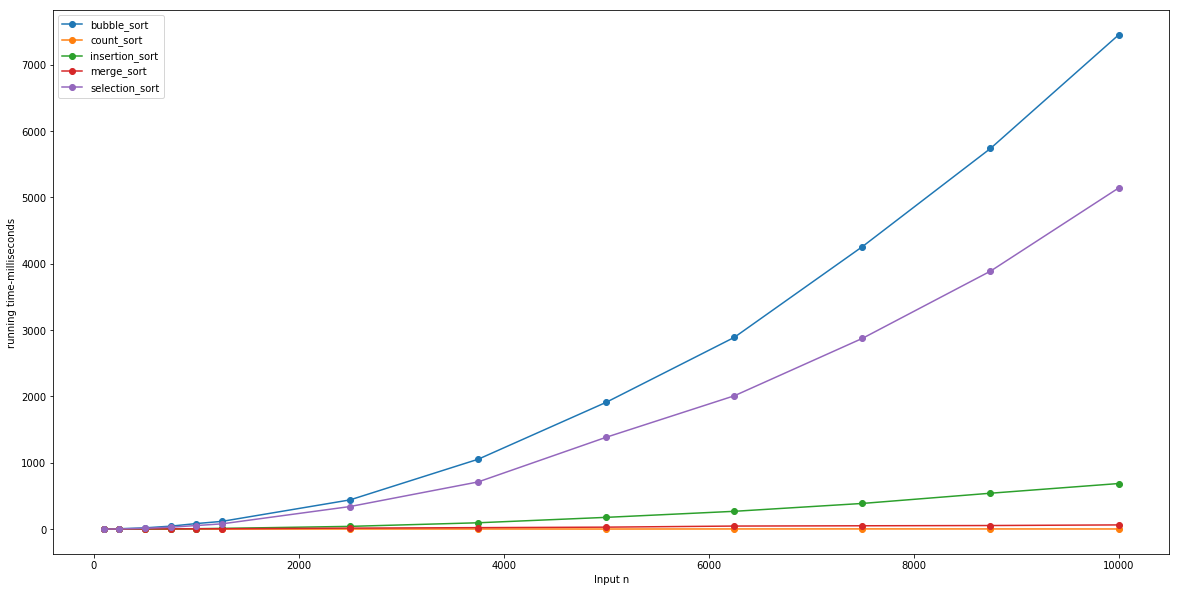

In [140]:
plot = df_restructure.T.iloc[:].plot(style='-o', figsize=(20, 10))
plot.set(xlabel="Input n", ylabel="running time-milliseconds")
plt.legend()
plt.show()

### Conclusion
***

In conclusion, we can now review the above graph for each average case, for each algorithm, as the input size increases. Previously, we reviewed the theta notation (average) for each of the Sorts and we can compare the theoretical versus the practical benchmarking. All algorithms are shown on the graph. The expected average case for each algorithms are:
1. Bubble Sort: n^2 or quadratic
2. Selection Sort: n^2 or quadratic
3. Insertion Sort: n^2 or quadratic
4. Merge Sort: nlogn or linearithmic
5. Counting Sort: n+k or linear

After reviewing the theoretical expected results versus the obtained results, the Bubble Sort and Selection Sort carry the characteristics of a quadratic complexity over time. The Bubble sort has the most severe growth rate, as the input size increases while the insertion sort has less rapid growth over time. The average expected complexity for the Insertion sort is a quadratic however the graph represents an n distribution which is more in line with a best case or Omega notation of n (linear). The expected behaviour of Merge Sort and the Counting Sort are linearithmic and linear respectively, the practical examples confirm that for the Merge sort. It is however expected that the Count sort performs less efficiently than the Merge Sort, this is not the case.

In conclusion all algorithms have been executed and benchmarked above, the expected results have been achieved for three out of the five Sorts. The Insertion Sort achieved the Best Case time complexity while the Count Sort behaved in a manner that was unexpected.

References
***

[1] Stability in sorting alogrithms https://www.geeksforgeeks.org/stability-in-sorting-algorithms/

[2] Insertion sort in 2 minutes https://www.youtube.com/watch?v=JU767SDMDvA